## Week 9
## Date : 4 Feb 2026

### Polynomial Linear Regression:

-Polynomial Regression is a form of linear regression where the relationship between the independent variable (x) and the dependent variable (y) is modelled as an nth degree polynomial.

-It is useful when the data exhibits a non-linear relationship allowing the model to fit a curve to the data.


Polynomial Regression Formula (degree 2 example):

    Y = b0 + b1X + b2X1^2

- If degree increases:  
Curve becomes flexible  
Risk of overfitting increases

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
data = {
    "cgpa": [5, 6, 7, 8, 9],
    "package": [2, 3, 3.5, 5, 8]
}

df = pd.DataFrame(data)

X = df[["cgpa"]]
y = df["package"]


In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


In [ ]:
model = LinearRegression()
model.fit(X_poly, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


C:\Users\jadha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


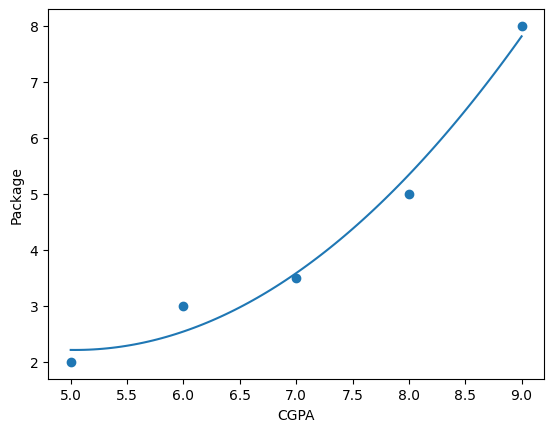

In [ ]:
plt.scatter(X, y)

X_range = np.linspace(5, 9, 100).reshape(-1,1)
X_range_poly = poly.transform(X_range)

y_pred = model.predict(X_range_poly)

plt.plot(X_range, y_pred)
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.show()


### Overfitting and Underfitting

#### 1. Overfitting:

-ML model performs well on the training datta, but it does not generalize well called as overfitting

-Overfitting occurs when a model learns too much from training data, including noise and random fluctuations.

-It performs very well on training data but poorly on new (test) data.

- jar trainning data high and testing data low asel tar overfitting hoto


#### 2. Underfitting:

-ML model does not performs well on the training data and does not generaliza well called as underfitting.

-Underfitting occurs when a model is too simple to capture the underlying pattern of the data.

-The model cannot learn the relationship between input (X) and output (Y).

- jar training and testing donhi data low asatil tar underfitting hoto

#### difference between Underfitting and overfitting

| Feature           | Underfitting | Overfitting |
| ----------------- | ------------ | ----------- |
| Model             | Too Simple   | Too Complex |
| Training Accuracy | Low          | Very High   |
| Testing Accuracy  | Low          | Low         |
| Bias              | High         | Low         |
| Variance          | Low          | High        |


- Degree 1 → Straight line → Underfitting
- Degree 2 → Smooth curve → Good fit
- Degree 15 → Zig-zag curve → Overfitting

####  1️⃣ Underfitting (Polynomial Degree = 1)

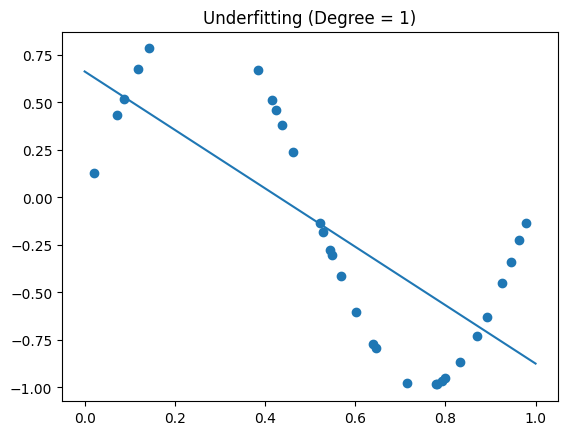

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Dataset
np.random.seed(0)
X = np.sort(np.random.rand(30, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel()

# Model (Degree 1)
model = make_pipeline(PolynomialFeatures(1), LinearRegression())
model.fit(X, y)

# Prediction
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# Plot
plt.scatter(X, y)
plt.plot(X_test, y_pred)
plt.title("Underfitting (Degree = 1)")
plt.show()


#### 2️⃣ Good Fit (Polynomial Degree = 2)

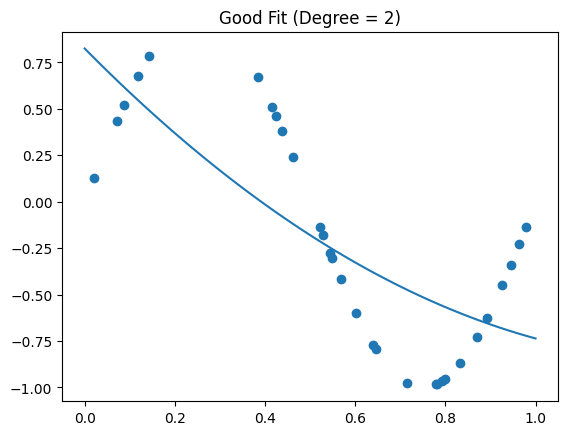

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Dataset
np.random.seed(0)
X = np.sort(np.random.rand(30, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel()

# Model (Degree 2)
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X, y)

# Prediction
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# Plot
plt.scatter(X, y)
plt.plot(X_test, y_pred)
plt.title("Good Fit (Degree = 2)")
plt.show()


#### 3️⃣ Overfitting (Polynomial Degree = 15)

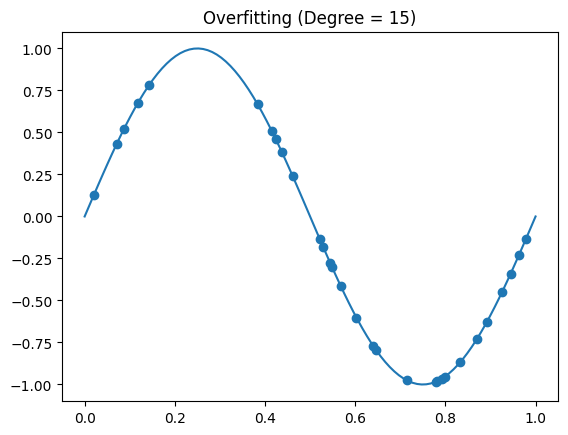

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Dataset
np.random.seed(0) # For reproducibility
X = np.sort(np.random.rand(30, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() 

# Model (Degree 15)
model = make_pipeline(PolynomialFeatures(15), LinearRegression())
model.fit(X, y)

# Prediction
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# Plot
plt.scatter(X, y)
plt.plot(X_test, y_pred)
plt.title("Overfitting (Degree = 15)")
plt.show()


.

### Regularization:

--Regularization is a technique used to reduce overfitting by adding a penalty term to the model.  
-Regularization is a machine learning technique used to reduce overfitting by adding a penalty to the model’s loss function so that the model does not become too complex and can perform well on new (unseen) data.

👉 Model overfitting hou naye mhanun  
👉 Loss function madhe extra penalty add karne  
👉 Jyamule model che weights control madhe rahtat  
👉 Model khup complex bant nahi  
👉 Ani test data var pan changla perform karto

- Why Regularization is Needed?

In ML:

Underfitting → Model is too simple  
Overfitting → Model is too complex & learns noise from training data

👉 Overfitting happens when model tries to make training error = 0

Example:

So we use Regularization to:

✅ Reduce model complexity  
✅ Prevent Overfitting  
✅ Improve generalization  
✅ Penalize large weights  

- Types:

1. Ridge Regession(l2)    
2. Lasso Regression(l1)    
3. Elastic Net Regression

#### 1. L2 Regularization (Ridge Regression)

-L2 Regularization is a technique that adds the square of the magnitude of model weights as a penalty term to the loss function to prevent overfitting and reduce model complexity.

👉 Loss function madhe weights cha square add karte as penalty term  
👉 Model che weight values kami karte (shrink karte)  
👉 Model chi complexity reduce karte  
👉 Overfitting avoid karayla madat karte  
👉 Ani model la new/test data var better generalization karayla madat karte  

##### Mathematical Form:
    J(θ)=∑(y−y^​)2+λ∑θ2


🧠 Internally What Happens?

Normally Linear Regression tries to:

👉 Minimize training error only

So model says:

"Weights large asel tari chalel pan error kami pahije!"

But Ridge Regression says:

"Error kami kar, pan weights pan small thev!"

So:

✔ Weight values shrink hotat  
✔ Model simple banto  
✔ Overfitting reduce hoto  
✔ Multicollinearity handle karto  
❌ Feature remove hot nahi (weights become small but not zero)

Example:

Imagine:

You are packing a school bag 🎒

Linear Regression = "Kitihi books taka, bag bharun jari geli tari chalel!"  
Ridge Regression = "Books taka pan bag overweight nako hou deu!"

So Ridge:

📌 Allows all features  
📌 But controls their importance (weight)

Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


Create Dataset

In [3]:
np.random.seed(0)

X = np.linspace(-3, 3, 50).reshape(-1,1)
y = 0.5*X**3 + np.random.randn(50,1)*3


Without Lasso (Normal Polynomial Regression)

In [4]:
model1 = make_pipeline(
    PolynomialFeatures(degree=10),
    LinearRegression()
)

model1.fit(X, y)
y_pred1 = model1.predict(X)


With Lasso (L1 Regularization)

In [5]:
model2 = make_pipeline(
    PolynomialFeatures(degree=10),
    Ridge(alpha=10)
)

model2.fit(X, y)
y_pred2 = model2.predict(X)


Plot Graph

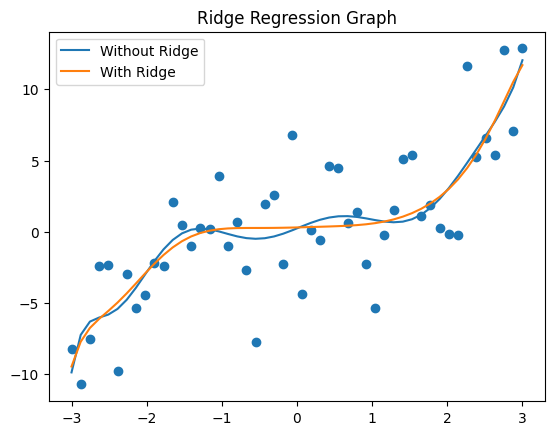

In [6]:
plt.scatter(X, y)

plt.plot(X, y_pred1, label="Without Ridge")
plt.plot(X, y_pred2, label="With Ridge")

plt.legend()
plt.title("Ridge Regression Graph")
plt.show()


#### 2. L1 Regression (Lasso Regression)

-L1 Regularization, also known as Lasso Regression, is a machine learning technique in which the absolute values of model weights are added as a penalty term to the loss function to reduce overfitting and perform feature selection.

👉 Loss function madhe weights cha absolute value add karte  
👉 Model che unnecessary weights = 0 karte  
👉 Important features thevte  
👉 Irrelevant features remove karte  
👉 Model chi complexity reduce karte  
👉 Overfitting avoid karayla madat karte  

##### Mathematical Form:

    J(θ)=∑(y−y^​)2+λ∑∣θ∣

##### Imagine:

Tumhi group project kartay 👩‍🏫

Teacher says:

"Jo student kaam kart nahi tyala group madhun kadha!"

So:

Important students → Group madhe rahatat  
Unnecessary students → Remove hotat 😄

Import Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


Create Noisy Dataset

In [12]:
np.random.seed(0)

X = np.linspace(-3, 3, 50).reshape(-1,1)
y = 0.5*X**3 + np.random.randn(50,1)*3


Without Lasso (Normal Polynomial Regression)

In [13]:
model1 = make_pipeline(
    PolynomialFeatures(degree=10),
    LinearRegression()
)

model1.fit(X, y)
y_pred1 = model1.predict(X)


With Lasso (L1 Regularization)

In [14]:
model2 = make_pipeline(
    PolynomialFeatures(degree=10),
    Lasso(alpha=0.1)
)

model2.fit(X, y)
y_pred2 = model2.predict(X)


C:\Users\jadha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e+02, tolerance: 1.330e-01
  model = cd_fast.enet_coordinate_descent(


Plot Both Graphs Together

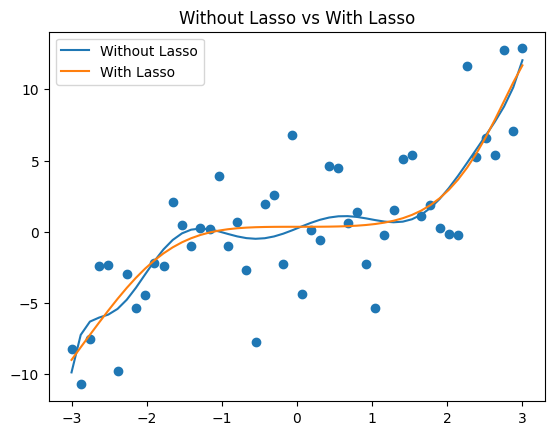

In [15]:
plt.scatter(X, y)

plt.plot(X, y_pred1, label="Without Lasso")
plt.plot(X, y_pred2, label="With Lasso")

plt.legend()
plt.title("Without Lasso vs With Lasso")
plt.show()


#### 3. Elastic net Regularization:


-Elastic Net is a machine learning regularization technique that combines both L1 (Lasso) and L2 (Ridge) penalties in the loss function to reduce overfitting and improve model performance.

👉 Loss function madhe L1 + L2 penalty add karte  
👉 Kahi features remove karte (L1 sarkhe)  
👉 Kahi features che weights shrink karte (L2 sarkhe)  
👉 Model chi complexity control karte  
👉 Overfitting reduce karte  
👉 Test data var generalization improve karte  

##### Mathematical Form:

    J(θ) = ∑(y−y^)2 + λ1∑∣θ∣ + λ2∑θ2


##### Imagine:

Tumhi group project kartay 👨‍🏫

Teacher says:

Jo student kaam kart nahi → group madhun kadha ❌ (L1)  
Jo student jast bolto → tyala softly bolayla sang ✔ (L2)

So:

Irrelevant students remove zalyat  
Important students control madhe alet

Import Libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


Create Dataset

In [17]:
np.random.seed(0)

X = np.linspace(-3, 3, 50).reshape(-1,1)
y = 0.5*X**3 + np.random.randn(50,1)*3


Without Regularization

In [18]:
model1 = make_pipeline(
    PolynomialFeatures(degree=10),
    LinearRegression()
)

model1.fit(X, y)
y_pred1 = model1.predict(X)


With Elastic Net

In [19]:
model2 = make_pipeline(
    PolynomialFeatures(degree=10),
    ElasticNet(alpha=0.1, l1_ratio=0.5)
)

model2.fit(X, y)
y_pred2 = model2.predict(X)


C:\Users\jadha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.229e+02, tolerance: 1.330e-01
  model = cd_fast.enet_coordinate_descent(


Plot Graph

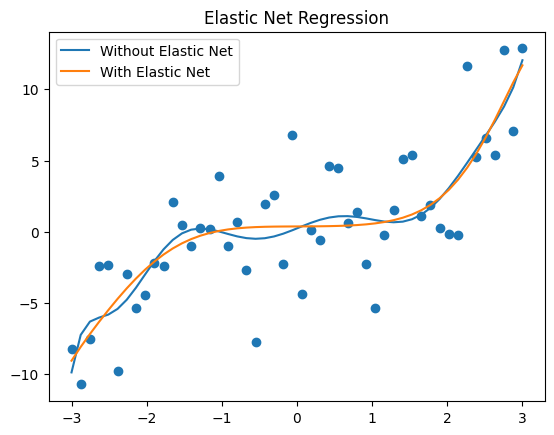

In [20]:
plt.scatter(X, y)

plt.plot(X, y_pred1, label="Without Elastic Net")
plt.plot(X, y_pred2, label="With Elastic Net")

plt.legend()
plt.title("Elastic Net Regression")
plt.show()
